In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import math
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pickle
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

In [9]:
Dataset1 = pd.read_pickle('Dataset1.pkl')

In [10]:
Dataset1['middle_name_distance'] = Dataset1['middle_name_distance'].replace(r'^\s*$', np.NaN, regex=True)

In [11]:
Dataset1['middle_name_distance'] = Dataset1['middle_name_distance'].astype(float)
Dataset1.drop(columns=['check_username'], inplace=True)

In [12]:
Dataset1

,user_id,onboarding_datetime,onboarding_date,fraud_flag,email_length,check_initials,vowels_count,vowels_ratio,consecutive_letters_count,total_consecutive_letters_length,max_consecutive_letters_length,total_digits,numeric_ratio,numeric_count,check_phonenumber,first_name_distance,middle_name_distance,last_name_distance,full_name_distance,domain,email_length_flag,vowels_ratio_flag,vowels_count_flag,consecutive_letters_count_flag,total_consecutive_letters_length_flag,max_consecutive_letters_length_flag,numeric_ratio_flag,numeric_count_flag,first_name_levenshtein_cutoff_flag,last_name_levenshtein_cutoff_flag,full_name_levenshtein_cutoff_flag,check_username_flag,total_risk_score,total_risk_score_weighted,len_unique_words,len_1,len_2,len_3,len_4,total_len,line_1_word_count,line_2_word_count,line_3_word_count,landmark_word_count,len_words,only_numeric_flag,no_numeric_flag,proportion_of_unique_words,numbers,letters,spaces,max_frequency_single_word,ip_rank,block3_rank,city,country,comm_city,comm_pincode,income_slab,email_verified_flag,time_from_install_to_onboarding,error_count_ob,aadhar_errors_count,aadhar_error_type1_count,aadhar_error_type1_flag,aadhar_error_type2_count,aadhar_error_type2_flag,aadhar_error_type3_count,aadhar_error_type3_flag,aadhar_error_type4_count,aadhar_error_type4_flag,aadhar_error_type5_count,aadhar_error_type5_flag,aadhar_error_type6_count,aadhar_error_type6_flag,aadhar_error_type7_count,aadhar_error_type7_flag,aadhar_error_flag,pan_errors_count,pan_error_type1_count,pan_error_type1_flag,pan_error_type2_count,pan_error_type2_flag,pan_error_type3_count,pan_error_type3_flag,pan_error_type4_count,pan_error_type4_flag,pan_error_flag,mobile_errors_count,mobile_error_type1_count,mobile_error_type1_flag,mobile_error_type2_count,mobile_error_type2_flag,mobile_error_type3_count,mobile_error_type3_flag,mobile_error_type4_count,mobile_error_type4_flag,mobile_error_type5_count,mobile_error_type5_flag,mobile_error_flag,back_page_clicked_count,merged_back_page_flag,ver_deg_flag,num_app_installed,flag_multiple_installation,vers_d2,vers_d3,vers_d2_flag,vers_d3_flag,carrier,device,os,platform,region,start_version,version,mname_errors_count,mname_error_flag,count_nominee_later,flag_nominee_not_filled,num_address_lines_filled,ckyc_occupation,ckyc_mother_name,mother_name_fake_flag,dv_flag,flag_mname_not_filled,aadhar_cb_dob_match_flag,comm_aadhar_pincode_match_flag
0,00002718-fcb3-450f-aa13-fa3da58a4bac,2021-11-17 13:10:32,2021-11-17 00:00:00,0.0,18,0,5,33.333333,0,0,1,3,16.666667,3,0,1.400000,NaN,1.600000,1.000000,gmail.com,0,0,0,0,0,0,0,0,0,1,0,0,1,0,5,22,1,1,12,36,3,0,0,2,5,0,1,100.0,0,31,8,1,1.0,7.0,Ahmedabad,India,Junagadh,362001.0,GT5LT10,0.0,7.498167,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,1.0,0.0,0.0,0.0,0,0,Jio 4G,Samsung Galaxy Phone,android 10,Android,Gujarat,1.4.46,1.4.46,0.0,0,0.0,0,2,Salaried,anishabanu,0,0,0,0,1
1,0000bb10-a35a-41fc-ba00-19cb45a0afd6,2021-09-06 09:20:54,2021-09-06 00:00:00,0.0,15,0,6,54.545455,1,2,2,4,26.666667,4,0,1.454545,1.636364,1.818182,1.680000,gmail.com,0,0,0,0,0,0,0,0,0,1,1,1,2,14,3,21,1,1,1,24,3,0,0,0,3,0,1,100.0,0,19,8,1,1.0,2.0,Bengaluru,India,Haveri,581110.0,GT0LT1,1.0,663.902883,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,1.0,0.0,0.0,0.0,0,0,AIRTEL,Redmi Phone,android 9,Android,Karnataka,1.4.28,1.5.4,0.0,0,0.0,0,1,Business,jianabbi,0,0,0,0,1
2,000155fa-a7f7-4d20-958f-08f6d4ed4b09,2021-11-18 22:16:27,2021-11-18 00:00:00,0.0,15,0,4,30.769231,0,0,1,2,13.333333,2,0,1.384615,NaN,1.846154,1.384615,gmail.com,0,0,0,0,0,0,0,0,0,1,0,0,1,0,4,25,1,1,11,38,3,0,0,1,4,0,0,100.0,3,30,7,1,1.0,36.0,Hyderabad,India,Nizamabad,503102.0,GT0LT1,0.0,19.464300,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0

In [13]:
list(Dataset1.columns)

['user_id',
 'onboarding_datetime',
 'onboarding_date',
 'fraud_flag',
 'email_length',
 'check_initials',
 'vowels_count',
 'vowels_ratio',
 'consecutive_letters_count',
 'total_consecutive_letters_length',
 'max_consecutive_letters_length',
 'total_digits',
 'numeric_ratio',
 'numeric_count',
 'check_phonenumber',
 'first_name_distance',
 'middle_name_distance',
 'last_name_distance',
 'full_name_distance',
 'domain',
 'email_length_flag',
 'vowels_ratio_flag',
 'vowels_count_flag',
 'consecutive_letters_count_flag',
 'total_consecutive_letters_length_flag',
 'max_consecutive_letters_length_flag',
 'numeric_ratio_flag',
 'numeric_count_flag',
 'first_name_levenshtein_cutoff_flag',
 'last_name_levenshtein_cutoff_flag',
 'full_name_levenshtein_cutoff_flag',
 'check_username_flag',
 'total_risk_score',
 'total_risk_score_weighted',
 'len_unique_words',
 'len_1',
 'len_2',
 'len_3',
 'len_4',
 'total_len',
 'line_1_word_count',
 'line_2_word_count',
 'line_3_word_count',
 'landmark_word_

In [14]:
#Dataset1.income_slab.value_counts()

In [15]:
Dataset1.rename(columns = {
'no_numeric_flag' : 'add_no_numeric_flag',
'check_initials' : 'email_check_initials',
'proportion_of_unique_words' : 'add_proportion_of_unique_words',
'domain' : 'email_domain',
'numeric_count_flag': 'email_numeric_count_flag',
'full_name_distance' : 'email_full_name_distance',
'numeric_ratio' : 'email_numeric_ratio',
'vowels_ratio_flag' : 'email_vowels_ratio_flag',
'numeric_ratio_flag' : 'email_numeric_ratio_flag',
'first_name_distance' : 'email_first_name_distance',
'first_name_levenshtein_cutoff_flag' : 'email_first_name_levenshtein_cutoff_flag',
'vowels_ratio' : 'email_vowels_ratio',
'full_name_levenshtein_cutoff_flag' : 'email_full_name_levenshtein_cutoff_flag',
'vowels_count' : 'email_vowels_count',
'numeric_count' : 'email_numeric_count',
'len_unique_words' : 'add_len_unique_words',
'len_words' : 'add_len_words',
'middle_name_distance' : 'email_middle_name_distance',
'total_digits' : 'email_total_digits',
'total_len' : 'add_total_len',
'len_1' : 'add_len_1',
'letters' : 'add_letters',
'spaces' : 'add_spaces',
'check_username_flag' : 'email_check_username_flag',
'line_1_word_count' : 'add_line_1_word_count',
'email_length' : 'email_length',
'max_frequency_single_word' : 'add_max_frequency_single_word',
'numbers' : 'add_numbers',
'total_consecutive_letters_length' : 'email_total_consecutive_letters_length',
'consecutive_letters_count' : 'email_consecutive_letters_count',
'landmark_word_count' : 'add_landmark_word_count',
'max_consecutive_letters_length' : 'email_max_consecutive_letters_length',
'only_numeric_flag' : 'add_only_numeric_flag',
'len_3' : 'add_len_3',
'check_phonenumber' : 'email_check_phonenumber',
'line_3_word_count' : 'add_line_3_word_count',
'last_name_distance': 'email_last_name_distance',
'vowels_count_flag' : 'email_vowels_count_flag',
'consecutive_letters_count_flag' : 'email_consecutive_letters_count_flag',
'total_consecutive_letters_length_flag' : 'email_total_consecutive_letters_length_flag',
'max_consecutive_letters_length_flag' : 'email_max_consecutive_letters_length_flag',
'last_name_levenshtein_cutoff_flag' : 'email_last_name_levenshtein_cutoff_flag',
'len_2' : 'add_len_2',
'len_4': 'add_len_4',
'line_2_word_count' : 'add_line_2_word_count'
}, inplace = True)

In [16]:
data = Dataset1[[
'user_id',
#'email_length',
'email_check_initials',
#'email_vowels_count',
'email_vowels_ratio',
'email_consecutive_letters_count',
'email_total_consecutive_letters_length',
'email_max_consecutive_letters_length',
'email_total_digits',
'email_numeric_ratio',
#'email_numeric_count',
'email_check_phonenumber',
'email_first_name_distance',
'email_middle_name_distance',
#'email_last_name_distance',
'email_full_name_distance',
'email_domain',
#'email_length_flag',
'email_vowels_ratio_flag',
#'email_vowels_count_flag',
#'email_consecutive_letters_count_flag',
#'email_total_consecutive_letters_length_flag',
#'email_max_consecutive_letters_length_flag',
'email_numeric_ratio_flag',
'email_numeric_count_flag',
'email_first_name_levenshtein_cutoff_flag',
#'email_last_name_levenshtein_cutoff_flag',
'email_full_name_levenshtein_cutoff_flag',
'email_check_username_flag',
'add_len_unique_words',
'add_len_1',
'add_len_2',
'add_len_3',
#'add_len_4',
'add_total_len',
'add_line_1_word_count',
#'add_line_2_word_count',
'add_line_3_word_count',
'add_landmark_word_count',
'add_len_words',
'add_only_numeric_flag',
'add_no_numeric_flag',
'add_proportion_of_unique_words',
'add_numbers',
'add_letters',
'add_spaces',
'add_max_frequency_single_word',
'fraud_flag',
'email_verified_flag',
'city', 
'country', 
'comm_city', 
'comm_pincode',
'income_slab',
'platform',
'region',
'num_address_lines_filled',
'ckyc_occupation',
'comm_aadhar_pincode_match_flag'
]]

In [17]:
data['fraud_flag'].mean()*100

3.637675929267412

In [18]:
data['fraud_flag'].value_counts()

0.0    186914
1.0      7056
Name: fraud_flag, dtype: int64

In [19]:
Y = pd.DataFrame((data['fraud_flag']))
X = data.drop(["fraud_flag", "user_id"], axis = 1)

In [20]:
pip install xgboost

In [21]:
#conda install py-xgboost

In [90]:
conda install -c conda-forge lightgbm

In [24]:
import sklearn.metrics

In [25]:
from sklearn.metrics import mean_absolute_percentage_error

In [26]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
#X['bid_email_exists']= label_encoder.fit_transform(X['bid_email_exists'])
X['city']= label_encoder.fit_transform(X['city'])
X['country']= label_encoder.fit_transform(X['country'])
X['email_domain']= label_encoder.fit_transform(X['email_domain'])
X['income_slab']= label_encoder.fit_transform(X['income_slab'])
X['region']= label_encoder.fit_transform(X['region'])
X['platform']= label_encoder.fit_transform(X['platform'])
X['comm_city']= label_encoder.fit_transform(X['comm_city'])
X['comm_pincode']= label_encoder.fit_transform(X['comm_pincode'])
X['ckyc_occupation']= label_encoder.fit_transform(X['ckyc_occupation'])

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, Y['fraud_flag'], test_size=0.25, random_state=1, stratify=Y['fraud_flag'])


## xgb

### Feature Categories

In [28]:
results=pd.DataFrame()
results['features']=X.columns
results['feature_category'] = 'others'

In [29]:
#subsetter = np.where((results['features'].str.contains(r'bid')==True))
#for i in subsetter:
#    results.iloc[i,1] = 'bureau_intelligence_variable'
    
subsetter2 = np.where((results['features'].str.contains(r'add')==True))
for i in subsetter2:
    results.iloc[i,1] = 'internal_address_variable'

#subsetter3 = np.where((results['features'].str.contains(r'new')==True))
#for i in subsetter3:
#    results.iloc[i,1] = 'new_variable'

subsetter4 = np.where((results['features'].str.contains(r'email')==True) & (results['features'].str.contains(r'bid')==False) & (results['features'].str.contains(r'others')==False))
for i in subsetter4:
    results.iloc[i,1] = 'internal_email_variable'

In [30]:
#results

In [31]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [32]:
import xgboost

[0]	validation_0-auc:0.86382
[1]	validation_0-auc:0.90653
[2]	validation_0-auc:0.91622
[3]	validation_0-auc:0.91869
[4]	validation_0-auc:0.91874
[5]	validation_0-auc:0.92041
[6]	validation_0-auc:0.92475
[7]	validation_0-auc:0.92302
[8]	validation_0-auc:0.92361
[9]	validation_0-auc:0.92521
[10]	validation_0-auc:0.92639
[11]	validation_0-auc:0.92849
[12]	validation_0-auc:0.92985
[13]	validation_0-auc:0.93070
[14]	validation_0-auc:0.93162
[15]	validation_0-auc:0.93183
[16]	validation_0-auc:0.93109
[17]	validation_0-auc:0.93163
[18]	validation_0-auc:0.93326
[19]	validation_0-auc:0.93368
[20]	validation_0-auc:0.93383
[21]	validation_0-auc:0.93444
[22]	validation_0-auc:0.93496
[23]	validation_0-auc:0.93760
[24]	validation_0-auc:0.93737
[25]	validation_0-auc:0.93870
[26]	validation_0-auc:0.93994
[27]	validation_0-auc:0.93994
[28]	validation_0-auc:0.94045
[29]	validation_0-auc:0.94077
[30]	validation_0-auc:0.94110
[31]	validation_0-auc:0.94141
[32]	validation_0-auc:0.94151
[33]	validation_0-au

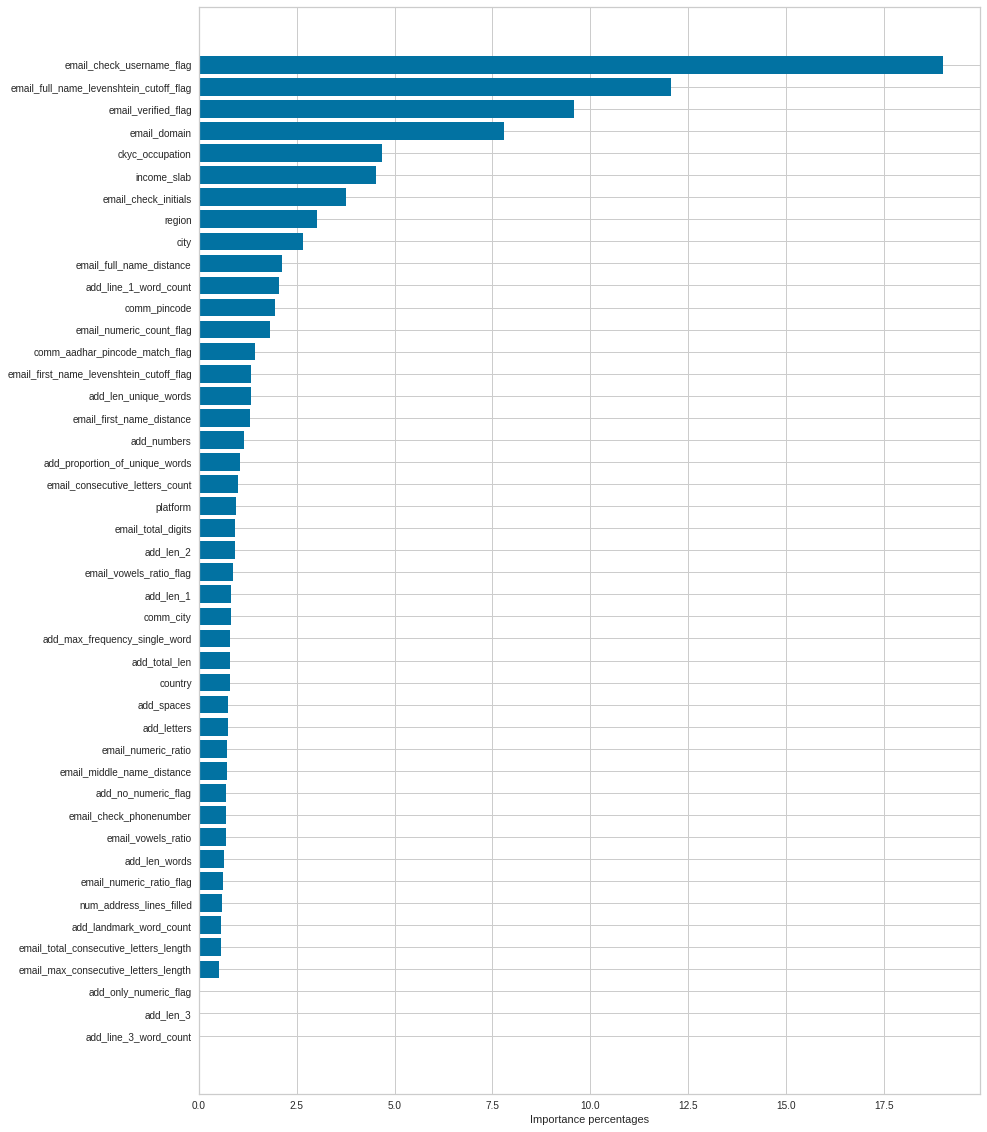

{'roc_auc_score_test': 0.9516339302668073, 'gini_train_gini': 0.9364009417854082, 'gini_test_gini': 0.9032678605336146, 'logloss_test_logloss': 0.08746425191325152, 'logloss_train_logloss': 0.07484027043077457}


In [33]:
               #learning_rate= [0.15, 0.1, 0.01],
               #gamma = [0.1, 0.5, 1, 1.5, 2, 10, 50, 100],
               #max_depth = [2, 4, 7,10 ,15, 18],
               #subsample = [0.4, 0.5, 0.6, 0.7, 0.8],
               #reg_alpha= [0, 0.5, 1, 20, 30],
               #reg_lambda = [1, 1.5, 2, 3, 20, 30],
               #n_estimators = [100, 250, 500])
            

model = xgboost.XGBClassifier(booster='gbtree', colsample_bylevel=1, 
                              colsample_bynode=1, colsample_bytree=0.5, eval_metric='auc', gamma=6, 
                              learning_rate=0.17, max_delta_step=0, max_depth=7, min_child_weight=4,
                              n_estimators=350, random_state=42, reg_alpha=0.2, reg_lambda=4, subsample=0.9)

model.fit(x_train, y_train,
early_stopping_rounds=16,
eval_set=[
    (x_test, y_test)
]);
    

train_pred=model.predict_proba(x_train)[:,1]
test_pred=model.predict_proba(x_test)[:,1]
    
    
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score, plot_roc_curve, roc_auc_score, classification_report,
confusion_matrix, roc_curve, matthews_corrcoef, auc, log_loss)
    
def new_gini(a,b):
    auc_score = roc_auc_score(np.array(b), a)
    gini_full = 2*auc_score - 1
    gini = np.float64(gini_full)
    return gini
    
metrics = {
    #'acc_test' : accuracy_score(y_test, val_pred),
    #'f1_test' : f1_score(y_test, val_pred),
    
'roc_auc_score_test' : roc_auc_score(np.array(y_test), test_pred),
     
'gini_train_gini' : new_gini(train_pred, y_train),
'gini_test_gini' : new_gini(test_pred, y_test),
        
'logloss_test_logloss' : log_loss(y_true=y_test,y_pred=test_pred),
'logloss_train_logloss' : log_loss(y_true=y_train,y_pred=train_pred)
}
#plt.rcParams["figure.figsize"] = (14, 20)
#xgboost.plot_importance(model,importance_type='gain')   

results['importances'] = model.feature_importances_
results.sort_values(by='importances',ascending=True,inplace=True)
results['imp_perc'] = (results['importances']/sum(results['importances']))*100
results

plt.figure(figsize=(14, 20))
ax = plt.barh(results['features'], results['imp_perc'])
plt.xlabel('Importance percentages')
plt.show()

print(metrics)

### Feature Importance

In [34]:
results.sort_values(by='importances',ascending=False,inplace=True)
results

,features,feature_category,importances,imp_perc
17,email_check_username_flag,internal_email_variable,0.190072,19.007195
16,email_full_name_levenshtein_cutoff_flag,internal_email_variable,0.120691,12.069133
34,email_verified_flag,internal_email_variable,0.095882,9.588195
11,email_domain,internal_email_variable,0.077981,7.798114
43,ckyc_occupation,others,0.046714,4.671428
39,income_slab,others,0.045382,4.538154
0,email_check_initials,internal_email_variable,0.037507,3.750688
41,region,others,0.030110,3.011005
35,city,others,0.026723,2.672259
10,email_full_name_distance,internal_email_variable,0.021365,2.136455


In [35]:
category_imp = pd.DataFrame(results.groupby(['feature_category'])[['importances', 'imp_perc']].agg('sum'))
category_imp.sort_values(by='imp_perc',ascending=False,inplace=True)

In [36]:
category_imp.reset_index(inplace=True, drop=False)

In [37]:
category_imp

,feature_category,importances,imp_perc
0,internal_email_variable,0.661859,66.185883
1,others,0.208694,20.869436
2,internal_address_variable,0.129447,12.944679


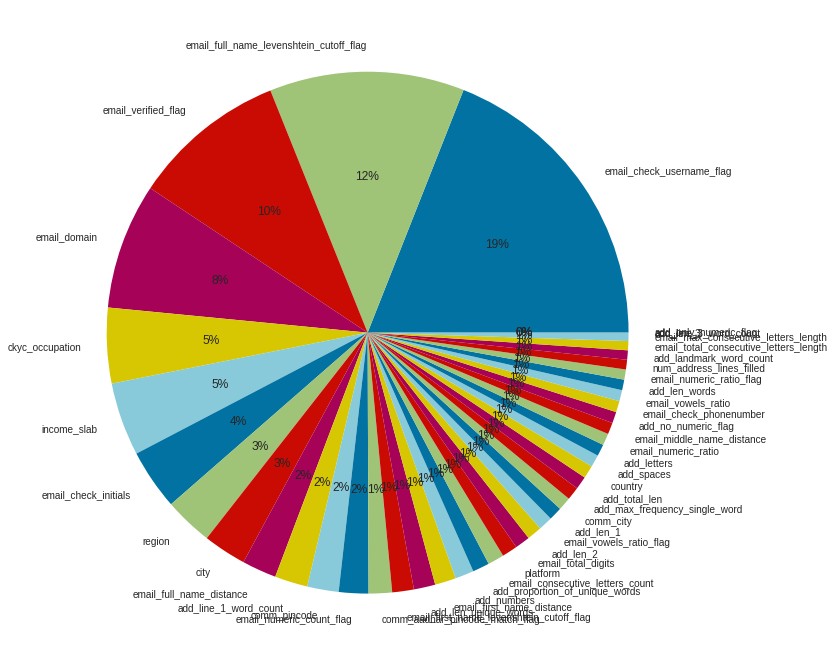

In [38]:
plt.figure(figsize=(12, 12))
ax = plt.pie(results['importances'], labels = results['features'], autopct = '%0.0f%%')
plt.show()

In [39]:
len(list(X.columns))

45

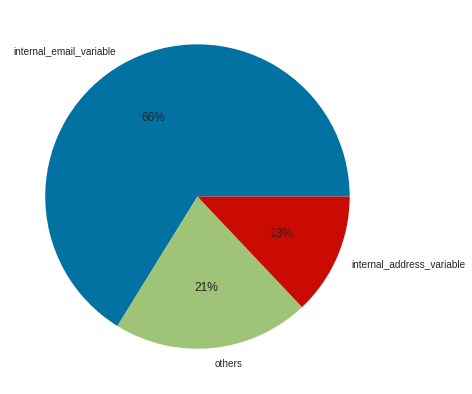

In [40]:
plt.figure(figsize=(7, 7))
ax = plt.pie(category_imp['importances'], labels = category_imp['feature_category'], autopct = '%0.0f%%')
plt.show()

## Capture rate, cumulative goods percentage

In [41]:
predictions_dev = train_pred
predictions_dev_test = test_pred
y_dev_train = y_train
#train[p] -- predic prob, train[f] -- actual flags
X_dev_train = x_train
y_dev_test = y_test
X_dev_test = x_test

In [42]:
train = pd.DataFrame()
train["p"] = predictions_dev
train["f"] = pd.DataFrame(y_dev_train).reset_index(drop = True)["fraud_flag"]

X_dev_train.reset_index(inplace = True)
X_dev_train["p"] = train["p"]
X_dev_train["f"] = train["f"]

### Deciles

In [43]:
X_dev_train['bin_rank'] = pd.qcut(X_dev_train['p'], 10, duplicates='drop')
cats, bins = pd.qcut(X_dev_train['p'], 10,duplicates='drop', retbins=True)
bins

array([5.20810863e-05, 3.92908801e-04, 6.36288268e-04, 9.49042360e-04,
       1.40766820e-03, 2.20097997e-03, 3.78819793e-03, 7.52278501e-03,
       1.84287410e-02, 9.74366978e-02, 8.85356724e-01])

In [44]:
def dev_dist(dist, X):
    dist["count"] = dist["f"]
    dist.drop(columns = ["f"], inplace = True)
    #dist["population"] = dist["count"][0]
    dist = dist.reset_index()
    k = dist.drop_duplicates(subset = "bin_rank")
    k.drop(["f"], axis = 1, inplace = True)
    k = k.rename(columns = {"count" : "goods"})
    k.reset_index(inplace = True)
    k.drop(["index"], axis = 1, inplace = True)
    k["population"] = X["bin_rank"].value_counts().to_frame().reset_index().sort_values(by = "index").reset_index()["bin_rank"]
    k["bads"] = k["population"] - k["goods"]
    k["bad %"] = k["bads"]/k["population"] * 100
    k = k.iloc[::-1]
    k = k.reset_index()
    k.drop("index", axis = 1, inplace = True)
    k["cumulative bads"] = 0
    k["cumulative bads"] = k["bads"].cumsum()
    k["cumulative population"] = k["population"].cumsum()
    k["cumulative goods"] = k["goods"].cumsum()
    k = k[["bin_rank", "population", "bads", "goods", "bad %", "cumulative population", "cumulative bads", "cumulative goods"]]
    k["capture rate"] = k["cumulative bads"] / np.sum(k["bads"]) * 100
    k["cum goods %"] = k["cumulative goods"] / np.sum(k["goods"]) * 100
    return k

In [45]:
dist = X_dev_train.groupby(["bin_rank"])["f"].value_counts().to_frame()

### Deciles-Train

In [46]:
k = dev_dist(dist, X_dev_train)
k

,bin_rank,population,bads,goods,bad %,cumulative population,cumulative bads,cumulative goods,capture rate,cum goods %
0,"(0.0974, 0.885]",14548,4733,9815,32.533682,14548,4733,9815,89.436886,7.001462
1,"(0.0184, 0.0974]",14548,429,14119,2.948859,29096,5162,23934,97.543462,17.073153
2,"(0.00752, 0.0184]",14547,71,14476,0.488073,43643,5233,38410,98.885110,27.399508
3,"(0.00379, 0.00752]",14548,29,14519,0.199340,58191,5262,52929,99.433107,37.756536
4,"(0.0022, 0.00379]",14547,15,14532,0.103114,72738,5277,67461,99.716553,48.122838
5,"(0.00141, 0.0022]",14548,8,14540,0.054990,87286,5285,82001,99.867725,58.494846
6,"(0.000949, 0.00141]",14548,2,14546,0.013748,101834,5287,96547,99.905518,68.871135
7,"(0.000636, 0.000949]",14547,2,14545,0.013749,116381,5289,111092,99.943311,79.246710
8,"(0.000393, 0.000636]",14548,2,14546,0.013748,130929,5291,125638,99.981104,89.622998
9,"(-0.0009479, 0.000393]",14548,1,14547,0.006874,145477,5292,140185,100.000000,100.000000


In [47]:
test = pd.DataFrame()
test["p"] = predictions_dev_test
test["f"] = pd.DataFrame(y_dev_test).reset_index(drop = True)["fraud_flag"]

X_dev_test.reset_index(inplace = True)
X_dev_test["p"] = test["p"]
X_dev_test["f"] = test["f"]

In [48]:
X_dev_test['bin_rank'] = pd.qcut(X_dev_test['p'], 10, duplicates='drop')
cats, bins = pd.qcut(X_dev_test['p'], 10, duplicates='drop', retbins=True)
bins

array([6.54494652e-05, 3.96554230e-04, 6.38261286e-04, 9.60728875e-04,
       1.43077243e-03, 2.21733795e-03, 3.82313686e-03, 7.53624626e-03,
       1.91646956e-02, 1.00930229e-01, 8.62683475e-01])

In [49]:
dist = X_dev_test.groupby(["bin_rank"])["f"].value_counts().to_frame()

### Deciles-Test

In [50]:
k = dev_dist(dist, X_dev_test)
k

,bin_rank,population,bads,goods,bad %,cumulative population,cumulative bads,cumulative goods,capture rate,cum goods %
0,"(0.101, 0.863]",4850,1472,3378,30.350515,4850,1472,3378,83.446712,7.228916
1,"(0.0192, 0.101]",4849,223,4626,4.598886,9699,1695,8004,96.088435,17.128550
2,"(0.00754, 0.0192]",4849,35,4814,0.721798,14548,1730,12818,98.072562,27.430504
3,"(0.00382, 0.00754]",4849,15,4834,0.309342,19397,1745,17652,98.922902,37.775257
4,"(0.00222, 0.00382]",4849,9,4840,0.185605,24246,1754,22492,99.433107,48.132851
5,"(0.00143, 0.00222]",4850,3,4847,0.061856,29096,1757,27339,99.603175,58.505425
6,"(0.000961, 0.00143]",4849,1,4848,0.020623,33945,1758,32187,99.659864,68.880139
7,"(0.000638, 0.000961]",4849,3,4846,0.061868,38794,1761,37033,99.829932,79.250572
8,"(0.000397, 0.000638]",4849,3,4846,0.061868,43643,1764,41879,100.000000,89.621006
9,"(-0.0009346000000000001, 0.000397]",4850,0,4850,0.000000,48493,1764,46729,100.000000,100.000000


## Top 10 Percentiles

In [51]:
X_dev_train['bin_rank'] = pd.qcut(X_dev_train['p'], 100, duplicates='drop')
cats, bins = pd.qcut(X_dev_train['p'], 100, duplicates='drop', retbins=True)
bins

array([5.20810863e-05, 1.60259992e-04, 1.94404984e-04, 2.21432726e-04,
       2.45886593e-04, 2.70130945e-04, 2.94897677e-04, 3.18719946e-04,
       3.43750671e-04, 3.68798873e-04, 3.92908801e-04, 4.17857064e-04,
       4.43601236e-04, 4.68906214e-04, 4.91247529e-04, 5.14304906e-04,
       5.38563072e-04, 5.62710788e-04, 5.87052200e-04, 6.10871429e-04,
       6.36288268e-04, 6.61684666e-04, 6.89153601e-04, 7.18043742e-04,
       7.47269813e-04, 7.78791844e-04, 8.10279932e-04, 8.43292917e-04,
       8.76659008e-04, 9.14058716e-04, 9.49042360e-04, 9.84777040e-04,
       1.02383816e-03, 1.06472189e-03, 1.10709422e-03, 1.15216707e-03,
       1.20005009e-03, 1.25035128e-03, 1.29990257e-03, 1.35225619e-03,
       1.40766820e-03, 1.46647526e-03, 1.53306999e-03, 1.60008296e-03,
       1.67233120e-03, 1.74694702e-03, 1.82617611e-03, 1.91473168e-03,
       2.00550850e-03, 2.10009958e-03, 2.20097997e-03, 2.31011705e-03,
       2.43120511e-03, 2.55237141e-03, 2.69178555e-03, 2.83843209e-03,
      

In [52]:
dist = X_dev_train.groupby(["bin_rank"])["f"].value_counts().to_frame()

In [53]:
k = dev_dist(dist, X_dev_train)
k.head(10)
#train

,bin_rank,population,bads,goods,bad %,cumulative population,cumulative bads,cumulative goods,capture rate,cum goods %
0,"(0.507, 0.885]",1455,370,1085,25.429553,1455,370,1085,8.333333,0.769302
1,"(0.427, 0.507]",1455,659,796,45.292096,2910,1029,1881,23.175676,1.333693
2,"(0.368, 0.427]",1455,631,824,43.367698,4365,1660,2705,37.387387,1.917936
3,"(0.317, 0.368]",1455,561,894,38.556701,5820,2221,3599,50.022523,2.551813
4,"(0.271, 0.317]",1454,426,1028,29.298487,7274,2647,4627,59.617117,3.280699
5,"(0.228, 0.271]",1455,359,1096,24.673540,8729,3006,5723,67.702703,4.057800
6,"(0.19, 0.228]",1455,292,1163,20.068729,10184,3298,6886,74.279279,4.882407
7,"(0.154, 0.19]",1455,243,1212,16.701031,11639,3541,8098,79.752252,5.741756
8,"(0.121, 0.154]",1454,188,1266,12.929849,13093,3729,9364,83.986486,6.639392
9,"(0.0974, 0.121]",1455,152,1303,10.446735,14548,3881,10667,87.409910,7.563264


In [54]:
X_dev_test['bin_rank'] = pd.qcut(X_dev_test['p'], 100, duplicates='drop')
cats, bins = pd.qcut(X_dev_test['p'], 100, duplicates='drop', retbins=True)
bins

array([6.54494652e-05, 1.61086146e-04, 1.94946764e-04, 2.22557241e-04,
       2.48071484e-04, 2.73162045e-04, 2.98227739e-04, 3.21683489e-04,
       3.48631529e-04, 3.72974856e-04, 3.96554230e-04, 4.19590115e-04,
       4.43202020e-04, 4.68098603e-04, 4.91246700e-04, 5.15793299e-04,
       5.37899113e-04, 5.59712786e-04, 5.87010602e-04, 6.10969774e-04,
       6.38261286e-04, 6.65217885e-04, 6.93288788e-04, 7.24012691e-04,
       7.55345747e-04, 7.88239995e-04, 8.17024664e-04, 8.50331793e-04,
       8.83908453e-04, 9.21379221e-04, 9.60728875e-04, 9.97031191e-04,
       1.03472056e-03, 1.07349264e-03, 1.11979437e-03, 1.16305279e-03,
       1.21338898e-03, 1.26263572e-03, 1.31513813e-03, 1.37113860e-03,
       1.43077243e-03, 1.49807300e-03, 1.55879455e-03, 1.62664351e-03,
       1.69656748e-03, 1.77242390e-03, 1.84996126e-03, 1.93439996e-03,
       2.02772038e-03, 2.11832047e-03, 2.21733795e-03, 2.33245332e-03,
       2.44227731e-03, 2.55993579e-03, 2.68928435e-03, 2.83656670e-03,
      

In [55]:
dist = X_dev_test.groupby(["bin_rank"])["f"].value_counts().to_frame()

In [56]:
k = dev_dist(dist, X_dev_test)
k.head(10)
#test

,bin_rank,population,bads,goods,bad %,cumulative population,cumulative bads,cumulative goods,capture rate,cum goods %
0,"(0.495, 0.863]",485,231,254,47.628866,485,231,254,13.095238,0.543560
1,"(0.42, 0.495]",485,192,293,39.587629,970,423,547,23.979592,1.170579
2,"(0.364, 0.42]",485,182,303,37.525773,1455,605,850,34.297052,1.818999
3,"(0.317, 0.364]",485,167,318,34.432990,1940,772,1168,43.764172,2.499519
4,"(0.274, 0.317]",485,148,337,30.515464,2425,920,1505,52.154195,3.220698
5,"(0.231, 0.274]",485,149,336,30.721649,2910,1069,1841,60.600907,3.939738
6,"(0.193, 0.231]",485,125,360,25.773196,3395,1194,2201,67.687075,4.710137
7,"(0.156, 0.193]",485,109,376,22.474227,3880,1303,2577,73.866213,5.514777
8,"(0.126, 0.156]",485,90,395,18.556701,4365,1393,2972,78.968254,6.360076
9,"(0.101, 0.126]",485,79,406,16.288660,4850,1472,3378,83.446712,7.228916


In [57]:
print(metrics)

{'roc_auc_score_test': 0.9516339302668073, 'gini_train_gini': 0.9364009417854082, 'gini_test_gini': 0.9032678605336146, 'logloss_test_logloss': 0.08746425191325152, 'logloss_train_logloss': 0.07484027043077457}


### ROC

In [88]:
pip install yellowbrick

In [89]:
pip install scipy

In [60]:
from yellowbrick.classifier import ClassificationReport

In [61]:
classes = [1, 0]

In [62]:
from yellowbrick.classifier import ROCAUC

In [63]:
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score, plot_roc_curve, roc_auc_score, classification_report,
    confusion_matrix, roc_curve, matthews_corrcoef, auc, log_loss)

In [64]:
x_train_new = x_train.drop(columns=['index', 'p', 'f', 'bin_rank'])
x_test_new = x_test.drop(columns=['index', 'p', 'f', 'bin_rank'])

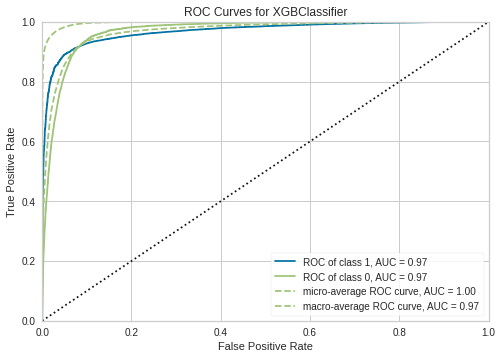

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [65]:
visualizer = ROCAUC(model, classes=classes)
visualizer.fit(x_train_new, y_train)        # Fit the training data to the visualizer
visualizer.score(x_train_new, y_train)        # Evaluate the model on the train data
visualizer.show() 

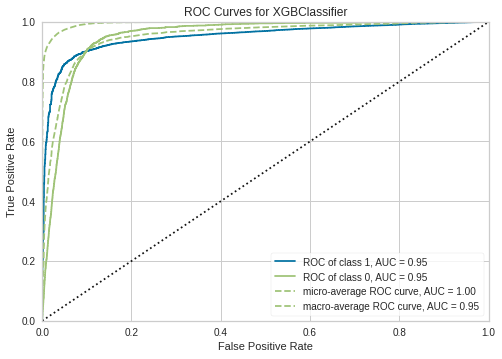

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [66]:
visualizer = ROCAUC(model, classes=classes)
visualizer.fit(x_train_new, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test_new, y_test)        # Evaluate the model on the test data
visualizer.show() 

In [67]:
#Mapping user ids, predicted probability of fraud, actual flag

In [68]:
y_train.mean()

0.036376884318483335

In [69]:
y_test.mean()

0.036376384220402944

In [70]:
y_train_actual =  pd.DataFrame(y_train)

In [71]:
y_train_actual

,fraud_flag
144720,0.0
56082,0.0
133177,0.0
164986,0.0
138894,1.0
...,...
105799,0.0
23666,0.0
137613,0.0
35944,0.0


In [72]:
x_train

,index,email_check_initials,email_vowels_ratio,email_consecutive_letters_count,email_total_consecutive_letters_length,email_max_consecutive_letters_length,email_total_digits,email_numeric_ratio,email_check_phonenumber,email_first_name_distance,email_middle_name_distance,email_full_name_distance,email_domain,email_vowels_ratio_flag,email_numeric_ratio_flag,email_numeric_count_flag,email_first_name_levenshtein_cutoff_flag,email_full_name_levenshtein_cutoff_flag,email_check_username_flag,add_len_unique_words,add_len_1,add_len_2,add_len_3,add_total_len,add_line_1_word_count,add_line_3_word_count,add_landmark_word_count,add_len_words,add_only_numeric_flag,add_no_numeric_flag,add_proportion_of_unique_words,add_numbers,add_letters,add_spaces,add_max_frequency_single_word,email_verified_flag,city,country,comm_city,comm_pincode,income_slab,platform,region,num_address_lines_filled,ckyc_occupation,comm_aadhar_pincode_match_flag,p,f,bin_rank
0,144720,1,28.571429,0,0,1,1,12.500000,0,1.142857,NaN,1.363636,402,1,0,0,0,0,0,8,38,1,1,41,8,0,0,8,0,0,100.000000,1,30,13,1,0.0,363,22,1315,18,7,1,125,1,4,-1,0.019012,0.0,"(0.0184, 0.0206]"
1,56082,0,40.000000,0,0,1,4,44.444444,0,1.750000,NaN,1.785714,402,0,0,0,1,1,1,2,12,1,1,15,2,0,0,2,0,0,100.000000,1,9,7,1,0.0,560,22,445,13701,4,2,154,1,3,1,0.224073,0.0,"(0.19, 0.228]"
2,133177,0,33.333333,1,2,2,0,0.000000,0,1.555556,NaN,1.277778,402,0,0,0,1,0,0,13,43,1,1,63,10,0,3,13,0,0,100.000000,2,47,16,1,0.0,229,22,323,5819,7,0,106,2,0,1,0.003458,0.0,"(0.00337, 0.00357]"
3,164986,0,0.000000,0,0,1,8,88.888889,0,2.000000,NaN,1.933333,402,1,1,1,1,1,1,5,33,1,1,41,4,0,1,5,0,1,100.000000,0,36,8,1,1.0,977,22,1950,4144,7,0,22,2,4,1,0.120620,0.0,"(0.0974, 0.121]"
4,138894,0,37.500000,0,0,1,3,27.272727,0,1.875000,NaN,1.750000,526,0,0,0,1,1,1,2,11,5,1,18,1,0,0,2,0,1,100.000000,0,16,5,1,0.0,977,22,272,715,7,0,22,2,0,-1,0.575276,1.0,"(0.507, 0.885]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145472,105799,0,35.714286,1,2,2,3,17.647059,0,1.428571,NaN,1.000000,402,0,0,0,0,0,0,6,54,1,1,57,9,0,0,9,0,0,66.666667,2,40,14,3,0.0,977,22,1336,14175,4,0,22,1,0,1,0.029067,0.0,"(0.0265, 0.0305]"
145473,23666,1,0.000000,1,2,2,7,77.777778,0,1.833333,NaN,1.833333,402,1,1,1,1,1,1,6,41,1,1,44,6,0,0,6,0,1,100.000000,0,36,11,1,0.0,767,22,270,2408,0,2,183,1,5,1,0.001830,0.0,"(0.00183, 0.00191]"
145474,137613,0,42.857143,0,0,1,2,22.222222,0,2.000000,NaN,1.461538,402,0,0,0,1,0,0,4,15,1,1,31,2,0,2,4,0,1,100.000000,0,27,7,1,0.0,836,68,90,3765,4,2,54,2,0,1,0.007181,0.0,"(0.00697, 0.00752]"
145475,35944,0,40.000000,0,0,1,0,0.000000,0,1.600000,NaN,1.333333,880,0,0,0,1,0,0,4,21,1,1,24,4,0,0,4,0,0,100.000000,5,11,9,1,0.0,914,22,571,33,4,0,125,1,3,1,0.024559,0.0,"(0.0234, 0.0265]"


In [73]:
y_train_actual.reset_index(inplace = True, drop = True)

In [74]:
y_train_actual

,fraud_flag
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
145472,0.0
145473,0.0
145474,0.0
145475,0.0


In [75]:
y_test_actual = pd.DataFrame(y_test)

In [76]:
y_test_actual.reset_index(inplace = True, drop = True)

In [77]:
df_train = x_train.copy()
df_test = x_test.copy()
df_train['flag']=y_train_actual
df_test['flag']=y_test_actual

In [78]:
df_train['m1_pred_prob'] = train_pred
df_ids = data['user_id']

In [79]:
train_results = pd.merge(df_ids, df_train, how = 'inner', left_index = True, right_on = 'index')
train_results.reset_index(inplace=True, drop = True)

In [80]:
train_results = train_results[['user_id', 'm1_pred_prob', 'flag']]

In [81]:
train_results

,user_id,m1_pred_prob,flag
0,0000bb10-a35a-41fc-ba00-19cb45a0afd6,0.000362,0.0
1,000155fa-a7f7-4d20-958f-08f6d4ed4b09,0.000534,0.0
2,00021037-caff-49c0-bb38-e5d7cc4bc51e,0.043532,0.0
3,00027860-8ae9-4eb1-9ea4-d5878a996cb1,0.023915,0.0
4,000395a7-578f-42b6-bb06-15926ccd17c6,0.000446,0.0
...,...,...,...
145472,zym-RGo-vVn8-qEf,0.001968,0.0
145473,zyz-obz-vhS5-oP4,0.034237,0.0
145474,zz7-NgS-ekqA-8Ci,0.000859,0.0
145475,zzK-wMk-rEZA-fqu,0.000610,0.0


In [82]:
df_test['m1_pred_prob'] = test_pred
df_ids = data['user_id']

In [83]:
test_results = pd.merge(df_ids, df_test, how = 'inner', left_index = True, right_on = 'index')
test_results.reset_index(inplace=True, drop = True)

In [84]:
test_results = test_results[['user_id', 'm1_pred_prob', 'flag']]

In [85]:
test_results

,user_id,m1_pred_prob,flag
0,00002718-fcb3-450f-aa13-fa3da58a4bac,0.002733,0.0
1,000324de-3c9a-46c8-a951-9da32a8d4f91,0.000752,0.0
2,0003f890-ffc4-48db-88ce-9a6bf962c374,0.007889,0.0
3,00063d74-4d4c-4fa6-a334-681a1c1ad118,0.006407,0.0
4,0008400a-93c3-4947-8069-b9dff9384155,0.001140,0.0
...,...,...,...
48488,zwU-BS7-FJHh-r14,0.030570,0.0
48489,zxC-nxV-CqYh-51V,0.008570,0.0
48490,zy5-pBl-rS7c-HgX,0.002319,0.0
48491,zyM-7xy-5T7S-WZz,0.008936,0.0


In [86]:
#train_results.to_pickle('m1_train_results.pkl')
#test_results.to_pickle('m1_test_results.pkl')